In [6]:
# importo librerías
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import calendar # idem
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
!conda env list

# conda environments:
#
base                     /home/cesar/anaconda3
venv                  *  /home/cesar/anaconda3/envs/venv



In [8]:
os.environ['PYTHONPATH']

'/opt/spark-2.2.0-bin-hadoop2.7/python:/opt/spark-2.2.0-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip:home/cesar/anaconda3/bin'

In [9]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2019_1C/tpdatos_v01/tpdatos2019/notebooks'

In [10]:
os.chdir('/home/cesar/universidad/7506/tp/2019_1C/data/')

In [11]:
%time
# Carga de archivos CSV
dfAuctions = pd.read_csv('auctions.csv', 
                 usecols=['country', 'date', 'device_id', 'platform','ref_type_id', 'source_id'], 
                 dtype={'platform':np.int8, 'ref_type_id':np.int8, 'source_id':np.int8})
dfAuctions.head(1)



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 23.8 µs


,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0


In [12]:
dfAuctions.head(10)

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0
5,6333597102633388268,2019-03-11 14:18:37.939485,1448534231953777480,1,1,0
6,6333597102633388268,2019-03-11 14:18:39.285471,7197160868095710320,1,1,0
7,6333597102633388268,2019-03-11 14:18:42.823963,160071254383181872,1,1,0
8,6333597102633388268,2019-03-11 14:18:43.587421,961481517958884390,1,1,0
9,6333597102633388268,2019-03-11 14:18:44.470248,2960551690927930513,1,1,0


## Analisis inicial

In [13]:
#platform = android, ios
dfAuctions['country'].unique()

array([6333597102633388268])

> Los datos son de un unico pais

In [14]:
#platform = android, ios
dfAuctions['platform'].unique()

array([1, 2])

In [15]:
dfAuctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [16]:
#ref_type_id = internal id for the ref_type
dfAuctions['ref_type_id'].unique()

array([1, 7])

In [17]:
dfAuctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

<font size="3">Se  ve que tanto <b>platform</b> como <b>ref_type_id</b> tiene la misma cantidad de valores distintos</font>

Se ve que tanto **platform** como **ref_type_id** tiene la misma cantidad de valores distintos

In [18]:
#source_id = source the auctions came from - fuente de la que proceden las subastas
dfAuctions['source_id'].unique()

array([0, 5, 6, 1, 2])

In [19]:
dfAuctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [20]:
dfAuctions.columns

Index(['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')

In [21]:
dfAuctions.shape

(19571319, 6)

# Cómo es la participación en las subastas según la plataforma?

In [22]:
dfAuctions_platform = dfAuctions['platform'].value_counts().to_frame()

In [23]:
dfAuctions_platform

,platform
1,15541825
2,4029494


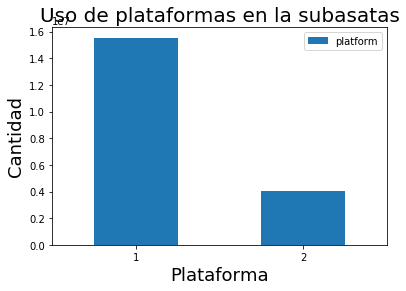

In [24]:
dfAuctions_platform.plot(rot=0,kind="bar")
plt.ylabel('Cantidad',fontsize=18);
plt.xlabel('Plataforma',fontsize=18);
plt.title( "Uso de plataformas en la subasatas",fontsize=20);
plt.savefig('auctionsPlatformAnalisis.png')


Podemos observar que hay un predominio de la plataforma 1 sobre la 2 en la participación en las subastas

# ¿Son lo mismo ref_type_id y platform?

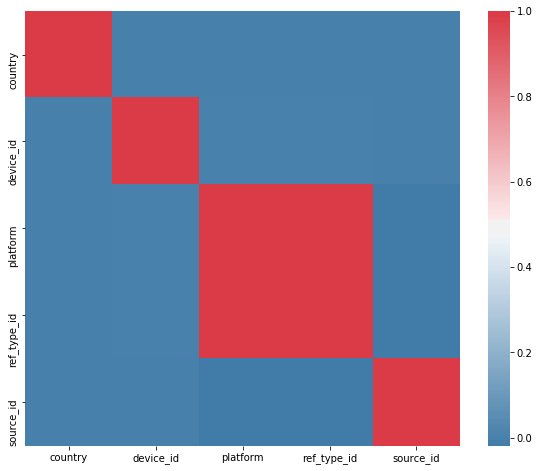

In [25]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = dfAuctions.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), 
      square=True, ax=ax) 

> con esto confirmamos la relación que existe entre **ref_type_id** y **platform**.

In [26]:
dfAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        int64
date           object
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: int64(2), int8(3), object(1)
memory usage: 503.9+ MB


In [27]:
dfAuctions["date"] = pd.to_datetime(dfAuctions["date"],format='%Y-%m-%d %H:%M:%S', utc=True)


In [28]:
#dfAuctions["date_single"] = pd.to_datetime(dfAuctions["date"])
dfAuctions["month"] = dfAuctions["date"].dt.month
dfAuctions["day"] = dfAuctions["date"].dt.day
dfAuctions["hour"] = dfAuctions["date"].dt.hour
dfAuctions["minute"] = dfAuctions["date"].dt.minute
dfAuctions["second"] = dfAuctions["date"].dt.second
dfAuctions["date_single"] =dfAuctions["date"].dt.date
dfAuctions["weekday"] = dfAuctions["date"].dt.weekday
dfAuctions["weekday_name"] = dfAuctions["date"].dt.weekday_name
dfAuctions['dayofyear'] = pd.to_datetime(dfAuctions["date_single"]).dt.dayofyear

In [29]:
dfAuctions.loc[:,'total'] = 1

In [35]:
dfAuctions["date_monthday"] = dfAuctions["date"].apply(lambda x: x.strftime('%d/%m'))

In [25]:
dfAuctions

,country,date,device_id,platform,ref_type_id,source_id,month,day,hour,minute,second,date_single,weekday,weekday_name,dayofyear,date_monthday
0,6333597102633388268,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,3,11,14,18,33,2019-03-11,0,Monday,70,11/03
1,6333597102633388268,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,3,11,14,18,34,2019-03-11,0,Monday,70,11/03
2,6333597102633388268,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,3,11,14,18,35,2019-03-11,0,Monday,70,11/03
3,6333597102633388268,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,3,11,14,18,36,2019-03-11,0,Monday,70,11/03
4,6333597102633388268,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,3,11,14,18,37,2019-03-11,0,Monday,70,11/03
5,6333597102633388268,2019-03-11 14:18:37.939485+00:00,1448534231953777480,1,1,0,3,11,14,18,37,2019-03-11,0,Monday,70,11/03
6,6333597102633388268,2019-03-11 14:18:39.285471+00:00,7197160868095710320,1,1,0,3,11,14,18,39,2019-03-11,0,Monday,70,11/03
7,6333597102633388268,2019-03-11 14:18:42.823963+00:00,160071254383181872,1,1,0,3,11,14,18,42,2019-03-11,0,Monday,70,11/03
8,6333597102633388268,2019-03-11 14:18:43.587421+00:00,961481517958884390,1,1,0,3,11,14,18,43,2019-03-11,0,Monday,70,11/03
9,6333597102633388268,2019-03-11 14:18:44.470248+00:00,2960551690927930513,1,1,0,3,11,14,18,44,2019-03-11,0,Monday,70,11/03


In [34]:
dfAuctions["date_monthday"].value_counts()


13/03    2938373
12/03    2779910
10/03    2637534
11/03    2574916
08/03    2303002
09/03    2074552
07/03    2047661
05/03    1182401
06/03    1032970
Name: date_monthday, dtype: int64

# ¿De que fechas obtenemos esta información?

In [26]:
dfAuctions.head(5)

,country,date,device_id,platform,ref_type_id,source_id,month,day,hour,minute,second,date_single,weekday,weekday_name,dayofyear,total
0,6333597102633388268,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,3,11,14,18,33,2019-03-11,0,Monday,70,1
1,6333597102633388268,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,3,11,14,18,34,2019-03-11,0,Monday,70,1
2,6333597102633388268,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,3,11,14,18,35,2019-03-11,0,Monday,70,1
3,6333597102633388268,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,3,11,14,18,36,2019-03-11,0,Monday,70,1
4,6333597102633388268,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,3,11,14,18,37,2019-03-11,0,Monday,70,1


In [37]:
dfAuctions_byDate = dfAuctions.groupby(['dayofyear','date_monthday'])['total'].count().to_frame()
dfAuctions_byDate

,,total
dayofyear,date_monthday,
64,05/03,1182401
65,06/03,1032970
66,07/03,2047661
67,08/03,2303002
68,09/03,2074552
69,10/03,2637534
70,11/03,2574916
71,12/03,2779910
72,13/03,2938373


In [38]:
dfAuctions_byDate = dfAuctions_byDate.reset_index()
dfAuctions_byDate

,dayofyear,date_monthday,total
0,64,05/03,1182401
1,65,06/03,1032970
2,66,07/03,2047661
3,67,08/03,2303002
4,68,09/03,2074552
5,69,10/03,2637534
6,70,11/03,2574916
7,71,12/03,2779910
8,72,13/03,2938373


In [39]:
dfAuctions_byDate = dfAuctions_byDate.set_index('date_monthday')
dfAuctions_byDate

,dayofyear,total
date_monthday,,
05/03,64,1182401
06/03,65,1032970
07/03,66,2047661
08/03,67,2303002
09/03,68,2074552
10/03,69,2637534
11/03,70,2574916
12/03,71,2779910
13/03,72,2938373


In [40]:
#dfAuctions_byDate = dfAuctions_byDate.loc[:,'weekday_name']
dfAuctions_byDate = dfAuctions_byDate.rename(columns={'total': 'total_por_dia'})
dfAuctions_byDate

,dayofyear,total_por_dia
date_monthday,,
05/03,64,1182401
06/03,65,1032970
07/03,66,2047661
08/03,67,2303002
09/03,68,2074552
10/03,69,2637534
11/03,70,2574916
12/03,71,2779910
13/03,72,2938373


> Observamos que el periodo de subastas del set de datos es del **5 de Marzo** al **13 de Marzo**.<br>


# Cuál es la cantidad de subastas por día durante el período?

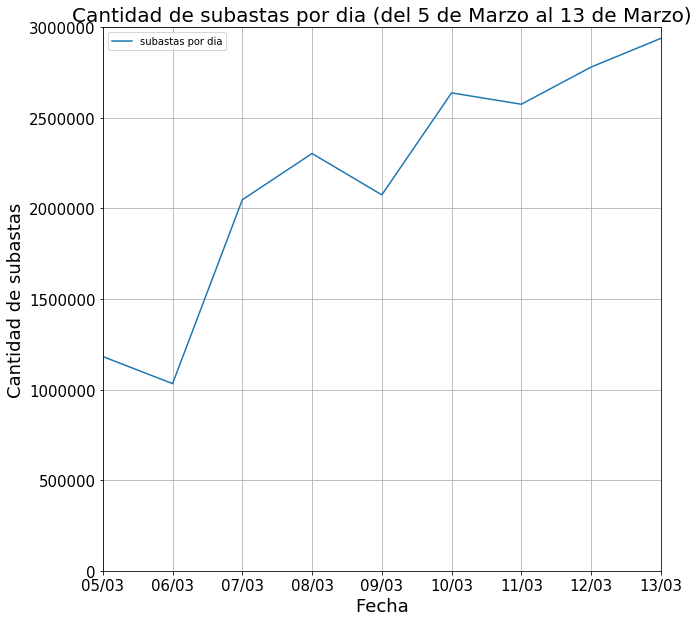

In [41]:
dfAuctions_byDate.loc[:,'total_por_dia'].plot(rot=0,figsize=(10,10),fontsize=15,x_compat=True,grid=True, ylim=(0, 3000000))
plt.title('Cantidad de subastas por dia (del 5 de Marzo al 13 de Marzo)',fontsize=20);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Fecha',fontsize=18);
plt.legend(['subastas por dia'], loc='upper left');
plt.show()


> Observamos que se proyecta sobre la cantidad de subastas una tendencia alcista. Pero el periodo de fechas sobre el cual se trabaja es de una semana para decidir si esta tendencia permanecera a lo largo del tiempo.

## ¿Cantidad de subastas por día y hora?

In [42]:
dfAuctionsByDateHour = dfAuctions.groupby(['dayofyear','date'])['weekday_name'].count().to_frame()
dfAuctionsByDateHour

weekday_name
dayofyear date                                          
64        2019-03-05 00:52:33.352526+00:00             1
          2019-03-05 00:52:40.105398+00:00             1
          2019-03-05 00:52:45.092232+00:00             1
          2019-03-05 00:52:46.102552+00:00             1
          2019-03-05 00:52:47.151640+00:00             1
          2019-03-05 00:52:48.815227+00:00             1
          2019-03-05 00:52:52.195001+00:00             1
          2019-03-05 00:52:52.311512+00:00             1
          2019-03-05 00:52:52.546848+00:00             1
          2019-03-05 00:52:52.870728+00:00             1
          2019-03-05 00:52:53.709922+00:00             1
          2019-03-05 00:52:54.070419+00:00             1
          2019-03-05 00:52:54.106856+00:00             1
          2019-03-05 00:52:54.782041+00:00             1
          2019-03-05 00:52:55.211641+00:00             1
          2019-03-05 00:52:56.025563+00:00             1
          2019-03-05 00:52:58.050826+00:00             1
          2019-03-05 00:52:58.391216+00:00             1
          2019-03-05 00:52:58.672906+00:00             1
          2019-03-05 00:52:58.774506+00:00             1
          2019-03-05 00:53:01.048264+00:00             1
          2019-03-05 00:53:01.409857+00:00             1
          2019-03-05 00:53:02.215364+00:00             1
          2019-03-05 00:53:02.414365+00:00             1
          2019-03-05 00:53:02.485569+00:00             1
          2019-03-05 00:53:03.109775+00:00             1
          2019-03-05 00:53:03.381676+00:00             1
          2019-03-05 00:53:03.494273+00:00             1
          2019-03-05 00:53:03.972807+00:00             1
          2019-03-05 00:53:04.487443+00:00             1
...                                                  ...
72        2019-03-13 23:59:59.572605+00:00             1
          2019-03-13 23:59:59.585266+00:00             1
          2019-03-13 23:59:59.587738+00:00             1
          2019-03-13 23:59:59.590172+00:00             1
          2019-03-13 23:59:59.649473+00:00             1
          2019-03-13 23:59:59.654288+00:00             1
          2019-03-13 23:59:59.663286+00:00             1
          2019-03-13 23:59:59.707176+00:00             1
          2019-03-13 23:59:59.709177+00:00             1
          2019-03-13 23:59:59.735810+00:00             1
          2019-03-13 23:59:59.754930+00:00             1
          2019-03-13 23:59:59.780781+00:00             1
          2019-03-13 23:59:59.784277+00:00             1
          2019-03-13 23:59:59.787514+00:00             1
          2019-03-13 23:59:59.794733+00:00             1
          2019-03-13 23:59:59.810414+00:00             1
          2019-03-13 23:59:59.817044+00:00             1
          2019-03-13 23:59:59.838902+00:00             1
          2019-03-13 23:59:59.859763+00:00             1
          2019-03-13 23:59:59.864496+00:00             1
          2019-03-13 23:59:59.896480+00:00             1
          2019-03-13 23:59:59.903910+00:00             1
          2019-03-13 23:59:59.916004+00:00             1
          2019-03-13 23:59:59.933993+00:00             1
          2019-03-13 23:59:59.948093+00:00             1
          2019-03-13 23:59:59.949856+00:00             1
          2019-03-13 23:59:59.960218+00:00             1
          2019-03-13 23:59:59.985544+00:00             1
          2019-03-13 23:59:59.994631+00:00             1
          2019-03-13 23:59:59.997032+00:00             1

[19570963 rows x 1 columns]

In [88]:
dfAuctionsByDateHour2 = dfAuctions.groupby(['dayofyear','date_monthday','hour','minute'])['total'].count().to_frame()
dfAuctionsByDateHour2.head(10)

total
dayofyear date_monthday hour minute       
64        05/03         0    52         20
                             53        600
                             54       1659
                             55       2274
                             56       2394
                             57       2532
                             58       2673
                             59       2707
                        1    0        2455
                             1        2594

In [89]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.reset_index()

dfAuctionsByDateHour2.head(10)


,dayofyear,date_monthday,hour,minute,total
0,64,05/03,0,52,20
1,64,05/03,0,53,600
2,64,05/03,0,54,1659
3,64,05/03,0,55,2274
4,64,05/03,0,56,2394
5,64,05/03,0,57,2532
6,64,05/03,0,58,2673
7,64,05/03,0,59,2707
8,64,05/03,1,0,2455
9,64,05/03,1,1,2594


In [90]:
dfAuctionsByDateHour2.columns

Index(['dayofyear', 'date_monthday', 'hour', 'minute', 'total'], dtype='object')

In [91]:
dfAuctionsByDateHour2.head(5)

,dayofyear,date_monthday,hour,minute,total
0,64,05/03,0,52,20
1,64,05/03,0,53,600
2,64,05/03,0,54,1659
3,64,05/03,0,55,2274
4,64,05/03,0,56,2394


In [92]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.reset_index()
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.set_index(['date_monthday'])
dfAuctionsByDateHour2.head(10)

,index,dayofyear,hour,minute,total
date_monthday,,,,,
05/03,0,64,0,52,20
05/03,1,64,0,53,600
05/03,2,64,0,54,1659
05/03,3,64,0,55,2274
05/03,4,64,0,56,2394
05/03,5,64,0,57,2532
05/03,6,64,0,58,2673
05/03,7,64,0,59,2707
05/03,8,64,1,0,2455


In [93]:
#list(range(len(dfAuctionsByDateHour2.loc[:,'total'].index)))

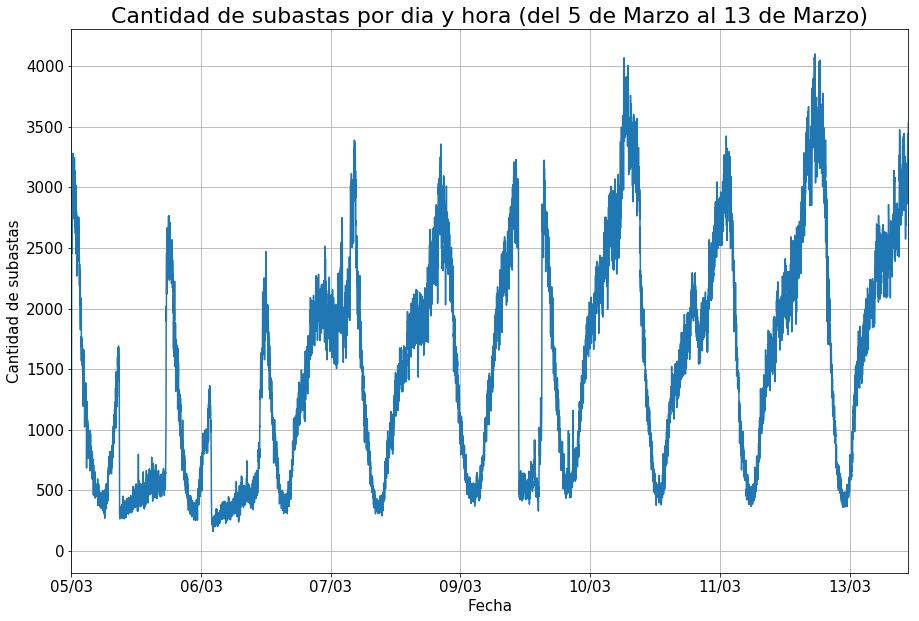

In [94]:
import matplotlib.dates as mdates

start, end = '05/03/2019','13/03/2019'
indexdate = ['05/03','06/03','07/03','08/03','09/03','10/03','11/03/2019','12/3/2019','13/3/2019']

dfAuctionsByDateHour2.loc[:,'total'].plot(rot=0,figsize=(15,10),x_compat=True,fontsize=15,grid=True)

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


plt.title('Cantidad de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22)
plt.ylabel('Cantidad de subastas',fontsize=15)
plt.xlabel('Fecha',fontsize=15)
#ax.set_xticklabels(sum([[i,''] for i in range(5, 14, 1)], []))

plt.show()



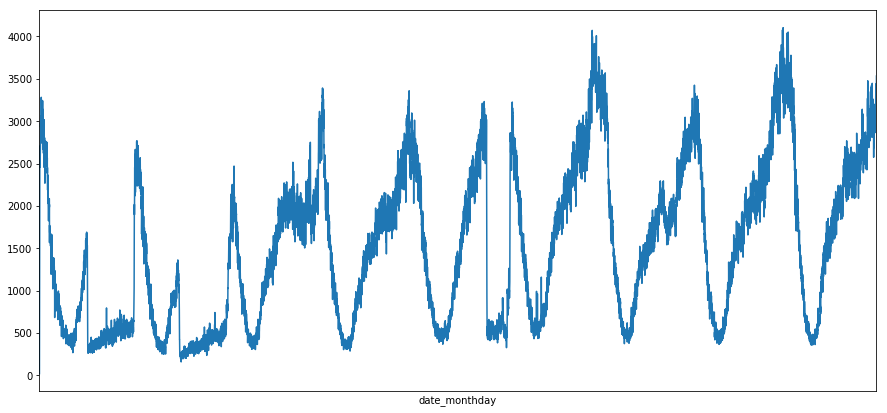

In [98]:
fig, ax = plt.subplots(figsize=(15,7))
dfAuctionsByDateHour2.loc[:,'total'].plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

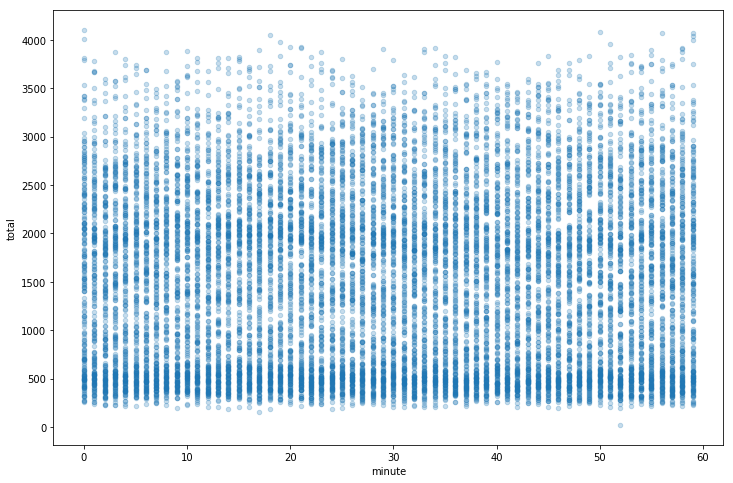

In [101]:
dfAuctionsByDateHour2.plot.scatter('minute','total',alpha=0.25,figsize=(12,8));


In [ ]:
#pivoted = pd.pivot_table(dfAuctions,values='total',columns='device_id', \
#               index='date')
#fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
#sns.heatmap(pivoted,cmap='PuBu');

# Cúal fue la hora donde se realizaron mayor cantidad de subastas?

In [50]:
dfAuctionsByHour3 = dfAuctions.groupby(['hour'])['total'].count().to_frame()
dfAuctionsByHour3



,total
hour,
0,1005716
1,1371091
2,1388464
3,1027541
4,716194
5,487243
6,325730
7,245109
8,247915


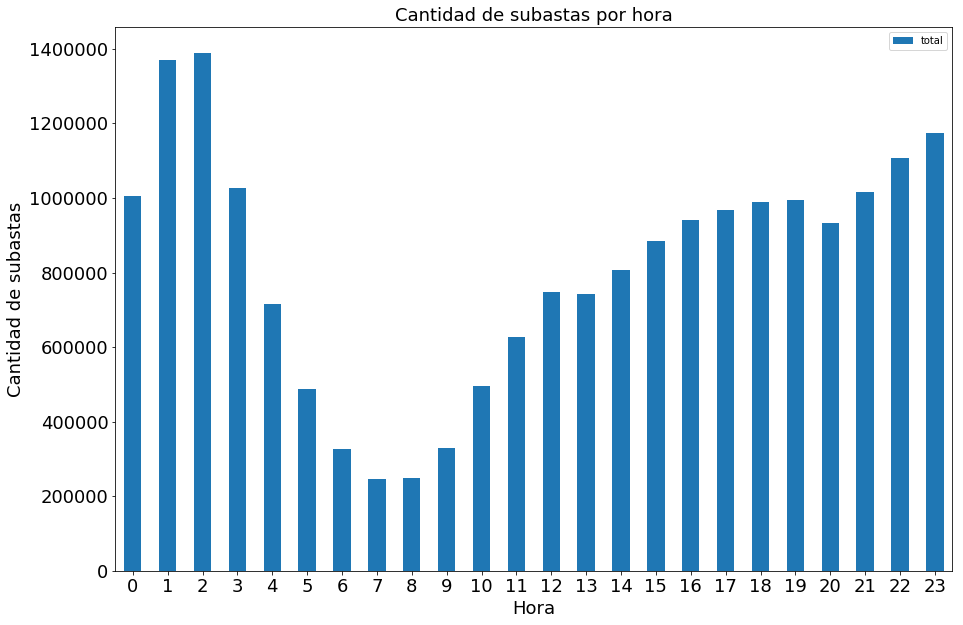

In [51]:
dfAuctionsByHour3.plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por hora',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Hora',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

In [52]:
dfAuctionsByDateHour3 = dfAuctions.groupby(['date_single','hour'])['total'].count().to_frame()
dfAuctionsByDateHour3.head(10)

total
date_single hour        
2019-03-05  0      14859
            1     174893
            2     155339
            3     108498
            4      74230
            5      52970
            6      38836
            7      29149
            8      25668
            9      25213

In [53]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
#by_weekday = dfAuctionsByDateHour3.groupby(dfAuctionsByDateHour3.dayofyear).mean()
#by_weekday.index = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun','Mon','Tues', 'Wed' ]
#by_weekday.plot(style=[':', '--', '-']);

In [54]:
dfAuctionsByDateHour3.columns

Index(['total'], dtype='object')

In [55]:
#dfAuctionsByDateHour3.loc[:,'weekday_name']
#dfAuctionsByDateHour3 = dfAuctionsByDateHour3.loc[:,'weekday_name']
#dfAuctionsByDateHour3

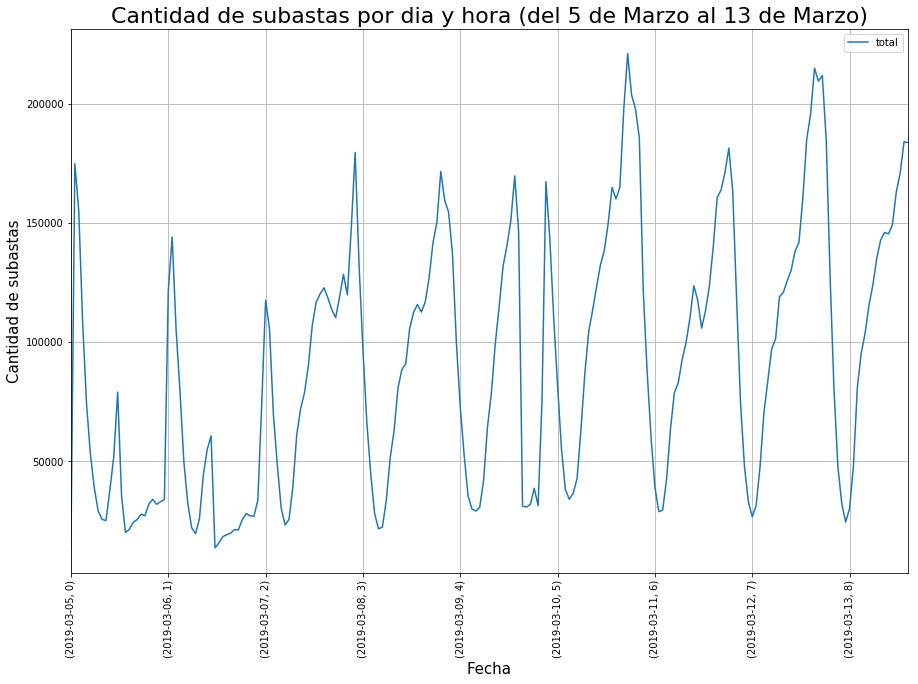

In [56]:
dfAuctionsByDateHour3.plot(rot=90,figsize=(15,10),fontsize=10,x_compat=True,grid=True)
plt.title('Cantidad de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22);
plt.ylabel('Cantidad de subastas',fontsize=15);
#index = ["",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.xlabel('Fecha',fontsize=15);
#plt.xticks(list(range(len(index))), dfAuctionsByDateHour3.index, fontsize=18)

#ax.xaxis.set_major_locator(dfAuctionsByDateHour3.WeekdayLocator())


In [57]:
#dfAuctionsByDateHour3[('date_single' == '2019-03-12')]
#dfAuctionsByDateHour3[dfAuctionsByDateHour3.date_single.dt.strftime('%D %H:%M:%S').between('12 00:00:00','12 24:00:00')]
dfAuctionsByDateHour3


total
date_single hour        
2019-03-05  0      14859
            1     174893
            2     155339
            3     108498
            4      74230
            5      52970
            6      38836
            7      29149
            8      25668
            9      25213
            10     38014
            11     51993
            12     79078
            13     35520
            14     20191
            15     21520
            16     24486
            17     25590
            18     27850
            19     27216
            20     32064
            21     34112
            22     32031
            23     33081
2019-03-06  0      34045
            1     121530
            2     144125
            3     105575
            4      79694
            5      49859
...                  ...
2019-03-12  18    138097
            19    141910
            20    160378
            21    185180
            22    195742
            23    214990
2019-03-13  0     209489
            1     211809
            2     185174
            3     127790
            4      80348
            5      47823
            6      32362
            7      24590
            8      30178
            9      48095
            10     81081
            11     95353
            12    103921
            13    115692
            14    124079
            15    135314
            16    142907
            17    146088
            18    145390
            19    149207
            20    162952
            21    170881
            22    184134
            23    183716

[216 rows x 1 columns]

# Cúal es el día en el que hubo mayor cantidad de subastas?

In [ ]:
startdate = pd.to_datetime('2019-03-07').date()
enddate = pd.to_datetime('2019-03-13').date()
dfAuctionsByDay4 = dfAuctions[(dfAuctions['date_single'] > startdate) & (dfAuctions['date_single'] <= enddate)].groupby(['weekday_name','weekday'])['total'].count().to_frame()
dfAuctionsByDay4 = dfAuctionsByDay4.reset_index()
dfAuctionsByDay4 = dfAuctionsByDay4.set_index('weekday_name').sort_values(['weekday'])
dfAuctionsByDay4.head(10)
#(df['birth_date'] > start_date) & (df['birth_date'] <= end_date)
#.loc['2019-03-07':'2019-03-13']

In [ ]:
dfAuctionsByDay4.loc[:,'total'].plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por dia de la semana',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Dia',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

> Observamos que los martes y miercoles son los dias con mas subastas, pero esto surge de que en el set de datos ambos dias tienen mas repeticiones.
Ahora filtraremos solo una semana

In [27]:
startdate = pd.to_datetime('2019-03-07').date()
enddate = pd.to_datetime('2019-03-13').date()
dfAuctionsByDay5 = dfAuctions[(dfAuctions['date_single'] > startdate) & (dfAuctions['date_single'] <= enddate)].groupby(['weekday_name','weekday'])['total'].count().to_frame()
dfAuctionsByDay5 = dfAuctionsByDay5.reset_index()
dfAuctionsByDay5 = dfAuctionsByDay5.set_index('weekday_name').sort_values(['weekday'])
dfAuctionsByDay5.head(10)
#(df['birth_date'] > start_date) & (df['birth_date'] <= end_date)
#.loc['2019-03-07':'2019-03-13']

,weekday,total
weekday_name,,
Monday,0,2574916
Tuesday,1,2779910
Wednesday,2,2938373
Friday,4,2303002
Saturday,5,2074552
Sunday,6,2637534


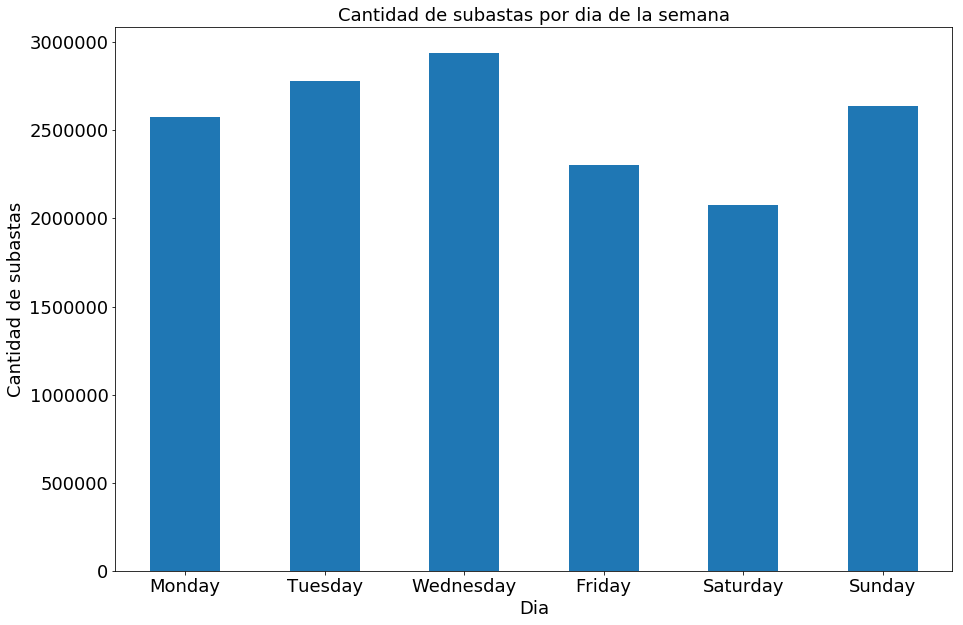

In [28]:
dfAuctionsByDay5.loc[:,'total'].plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por dia de la semana',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Dia',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

# Cuales son los 5 dispositivos que más participan de la subastas.

In [30]:
# extracting greatest 5 
device_id_Top5 = dfAuctions.groupby("device_id")["device_id"].count().nlargest(5)

# display 
device_id_Top5

device_id
633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
519658456951133298     10541
2435544514359302887    10274
8751190726444323885    10256
1835469468095030098    10121
1800317677967270083    10036
9027154272484048876     9958
7574657722181550308     9767
5051610571898428259     9642
320899491737875154      9388
8292793494956750501     9315
201759600719985554      9158
8021195662481548645     9128
7650408579713341483     9020
6392567838173461255     8994
1478017482044456084     8839
6203407103275384250     8823
68016455690089173       8809
8496718680483076445     8682
8491787427844905567     8513
4834359787191717922     8495
                       ...  
849743132728597146         1
849772117075079139         1
4352303434982814773        1
6879

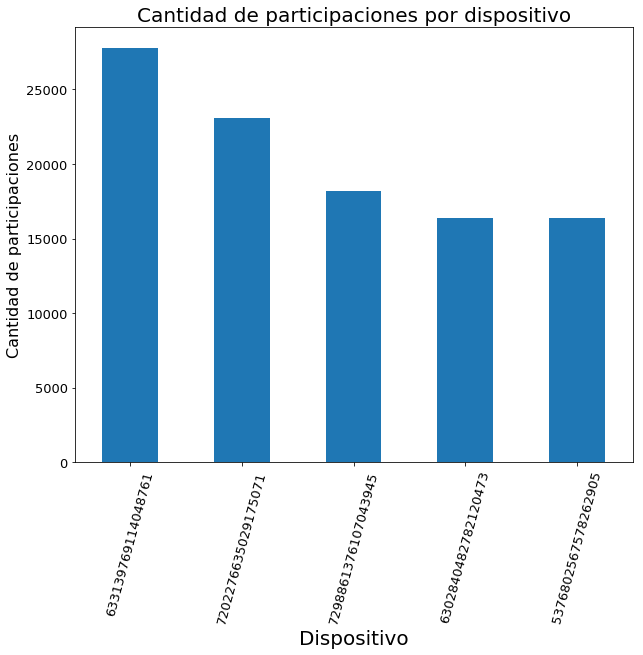

In [61]:

device_id_Top5
device_id_Top5.plot(kind='bar', rot=75, figsize=(10,8) ,fontsize=13);

plt.title('Cantidad de participaciones por dispositivo', fontsize=20);
plt.ylabel('Cantidad de participaciones', fontsize=16);
plt.xlabel('Dispositivo', fontsize=20);

# Como es la distribución del participacion por día segun la plataforma?

In [ ]:
dfAuctions.groupby(['date_single','platform'])['total'].size().unstack() \
 .plot(kind='bar',stacked=False, figsize=(10,8) ,fontsize=13)

plt.title('Distribución por dispositivo y día', fontsize=20);
plt.ylabel('Cantidad de participaciones por dispositivo', fontsize=16);
plt.xlabel('Fecha', fontsize=20);
plt.show()

> Aquí se observa un comportamiento parejo de la plataforma 2 en la participación de las subastas en el periodo mientras que la plataforma 1 fue ascendiedo por día

# Cuantas instalaciones hubo por dispositivo?

> Esta pregunta surge luego de observar los 5 dispositivos con más pedidos de subastas.

In [54]:
# extracting greatest 5 
device_id_Top = dfAuctions.groupby("device_id")["total"].count().sort_values(ascending=False).to_frame()

# display 
#device_id_Top['total' > 1]


In [55]:
device_id_Top[(device_id_Top.total > 30)].count()


total    78412
dtype: int64

In [56]:
device_id_Top[(device_id_Top.total == 31)].count()


total    1223
dtype: int64

In [57]:
23859
device_id_Top[(device_id_Top.total == 31)].count()


total    1223
dtype: int64

In [58]:
device_id_Top.head(10)

,total
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367
8963711959081981780,14362
795159065504552200,12275
6841615430383729819,12077
5384039226444052914,11632


In [75]:
device_id_Top2 = device_id_Top.reset_index().groupby('total').count()
device_id_Top2 = device_id_Top2.reset_index()
device_id_Top2.rename(columns={'device_id':'cantidad_de_dispositivos',
                          'total':'cantidad_de_subastas_que_participo'}, 
                 inplace=True)

In [79]:
device_id_Top2.head(10)

,cantidad_de_subastas_que_participo,cantidad_de_dispositivos
0,1,23859
1,2,14740
2,3,10713
3,4,8424
4,5,6980
5,6,5913
6,7,5146
7,8,4683
8,9,4094
9,10,3725


In [80]:
device_id_Top2.sort_values(by='cantidad_de_subastas_que_participo',ascending=False).head(10)

,cantidad_de_subastas_que_participo,cantidad_de_dispositivos
2582,27762,1
2581,23055,1
2580,18188,1
2579,16400,1
2578,16367,1
2577,14362,1
2576,12275,1
2575,12077,1
2574,11632,1
2573,11565,1


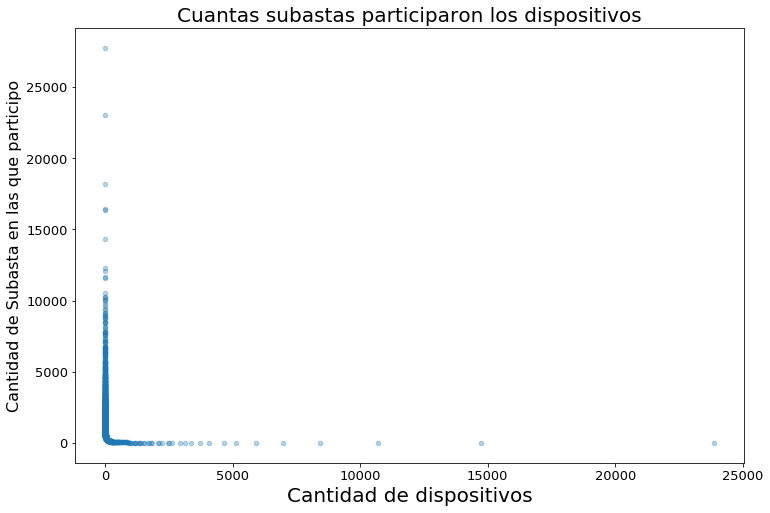

In [85]:


device_id_Top2.plot.scatter(x ='cantidad_de_dispositivos', y ='cantidad_de_subastas_que_participo', figsize=(12,8),alpha=0.32 ,fontsize=13) 
plt.title('Cuantas subastas participaron los dispositivos', fontsize=20);
plt.ylabel('Cantidad de Subasta en las que participo', fontsize=16);
plt.xlabel('Cantidad de dispositivos', fontsize=20);

plt.show() 

In [68]:
device_id_Top[ device_id_Top.total == 2 ]

,total
device_id,
1047502470092928210,2
5494412021842904400,2
1047655289329703123,2
1331468414729541176,2
1031634787055032560,2
5513789663248167313,2
5494066025080351496,2
5538572762222811785,2
6399896766819262362,2


In [71]:
device_id_Top.head(10)

,total
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367
8963711959081981780,14362
795159065504552200,12275
6841615430383729819,12077
5384039226444052914,11632
